In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [67]:
# Download stock data for Visa Inc. (V)
ticker = 'V'
start_date = '2005-01-01'
end_date = '2023-04-03'
df = yf.download(ticker, start=start_date, end=end_date, interval="1mo")


[*********************100%***********************]  1 of 1 completed


In [68]:
# Save the data to a CSV file

# filename = f'{ticker}_{start_date}_{end_date}.csv'
# df.to_csv(filename)

In [69]:
df.drop("Volume", axis=1, inplace=True)
df["Price"] = df.mean(axis=1)
data = pd.Series(df["Price"]) 
data = data.dropna() 

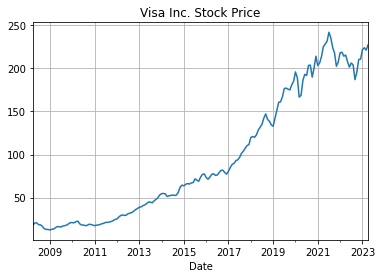

In [70]:
# Plot the data
data.plot(title='Visa Inc. Stock Price')
plt.grid()

In [71]:
data.describe()

count    181.000000
mean      95.057667
std       73.855949
min       12.332461
25%       24.975717
50%       71.638284
75%      167.213458
max      242.122321
Name: Price, dtype: float64

In [72]:
data_copy = data.copy()

In [73]:
data

Date
2008-04-01     18.341222
2008-05-01     20.638327
2008-06-01     20.324307
2008-07-01     18.372115
2008-08-01     18.161568
                 ...    
2022-12-01    210.844772
2023-01-01    221.650000
2023-02-01    224.116016
2023-03-01    221.312003
2023-04-01    227.301999
Name: Price, Length: 181, dtype: float64

In [74]:
# Split the data into training and test sets
train_size = int(len(data) * 0.80)
train_data = data[:train_size]
test_data = data[train_size:]
test_size = len(test_data)

ADF Statistic: 2.033073
p-value: 0.998714
All adfuller values: (2.033072578308146, 0.9987144143985689, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 655.8545662414621)


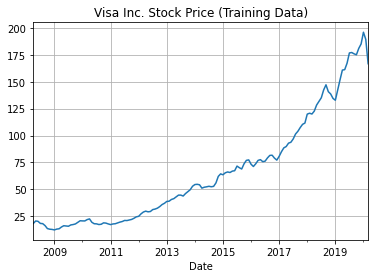

In [75]:
# Augmented Dickey-Fuller test
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('All adfuller values:', result)
train_data.plot(title='Visa Inc. Stock Price (Training Data)')
plt.grid()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


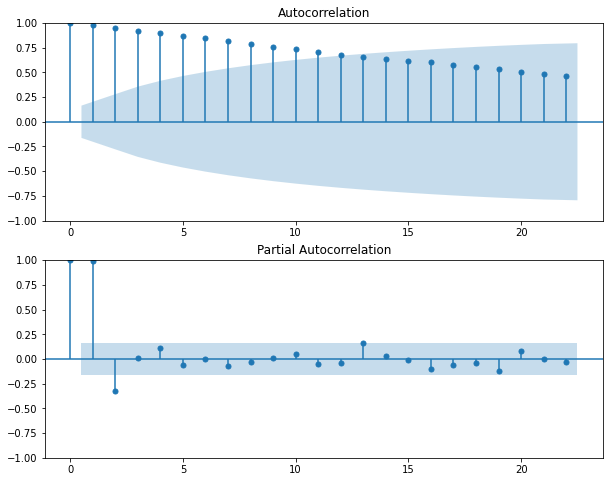

In [76]:
# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data, ax=ax1)
plot_pacf(train_data, ax=ax2)
plt.show()

ADF Statistic: -2.471310
p-value: 0.122612
All adfuller values: (-2.4713097780661313, 0.12261191735493199, 13, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 654.4812604489575)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


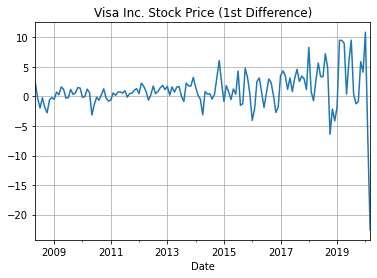

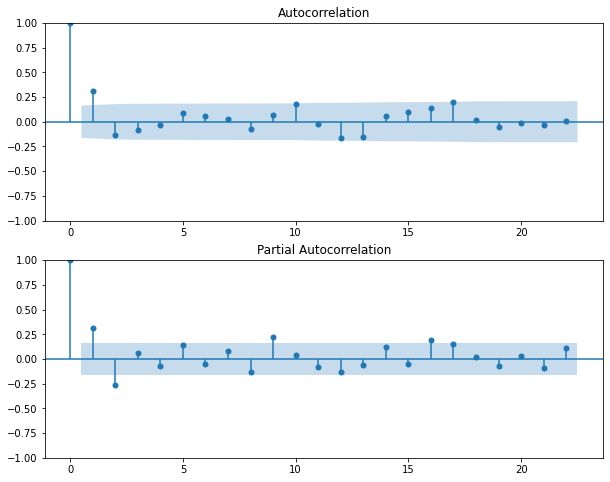

In [79]:
# Difference the data
train_data_diff = train_data.diff().dropna()
train_data_diff.plot(title='Visa Inc. Stock Price (1st Difference)')
plt.grid()

# Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(train_data_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('All adfuller values:', result_diff)


# Plot the ACF and PACF of the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data_diff, ax=ax1)
plot_pacf(train_data_diff, ax=ax2)
plt.show()

ADF Statistic: -4.984900
p-value: 0.000024
All values: (-4.984899645966705, 2.3772094403086682e-05, 14, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, 642.4740214231448)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


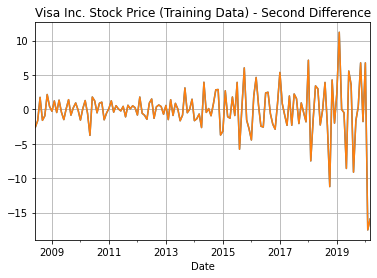

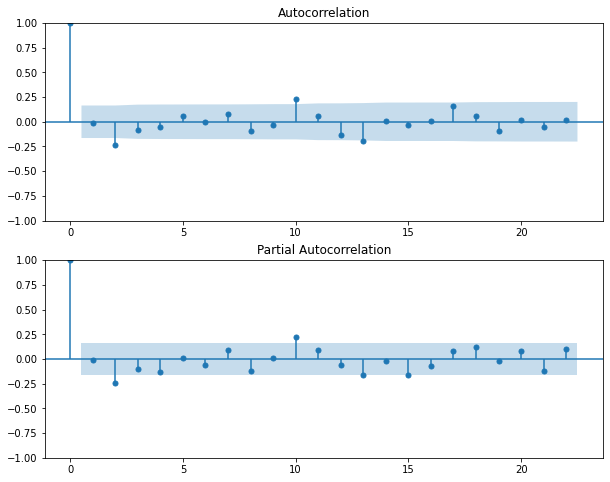

In [80]:
# Difference the data again
train_data_diff2 = train_data_diff.diff().dropna()
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')

# Augmented Dickey-Fuller test on second differenced data
result_diff2 = adfuller(train_data_diff2)
print('ADF Statistic: %f' % result_diff2[0])
print('p-value: %f' % result_diff2[1])
print('All values:', result_diff2)
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')
plt.grid()

# PACF and ACF plots on second differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data_diff2, ax=ax1)
plot_pacf(train_data_diff2, ax=ax2)
plt.show()